# Documentation revision 04/18/2017
### NOTE: Complete documentation is available live within the jupyter notebook environment by pressing SHIFT + TAB inside the brackets of a class, function or method.

Author: Steve Wald, Bluefish Analytics, LLC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from id_dict import ( # dictionaries and functions supporting conversion between IDs & names
    strain_dict, # dictionary of strain names.lower() (keys) mapped ID numbers (values)
    names_formatted, # dict of strain names.lower() (keys) mapped to formatted strain names
    locations_dict, # dict of locations (i.e., businesses) names (k) mapped to location IDs (v)
    product_name_from_ID, # function to extract product name from ID number
    locations_name_from_ID, # function to extract location name from ID number
    locations_id_dict # dict of location IDs (k) mapped to location names (v)
)

from trend_analysis import ( # Classes and functions to import and transform data for vizualization
    ImportSalesData, # Universal import function, accesses database for sales time series
    SalesTrendsDF, # FOR SINGLE PRODUCT OR PLACE, slice and transform sales time series 
        # via MULTIPLE smoothing and norming paramters
    CompTrendsDF, # FOR MULTIPLE PRODUCTS / PLACES, slice and transform sales time series
        # via a SINGLE set of smoothing and norming parameters
    SalesStatsDF, # Produce df of aggregated stats from comparative sales time series
    RankProductsPlaces, # Rank products or places by statistic
    HbarData, # Generate df of products or places ranked by one or more metrics for bar plot
    BestSellerData, # Generate series of HbarData rankings, and labeler, for slope plot
    biz_lookup, # Return list of IDs for all businesses within specified citie(s) or zipcode(s)
)

from graph_trends import ( # Major plotting functions
    PlotRawData, # Plot complete time series for raw data on a single product or place
    PlotCompTrends, # Plot multiple products / places on a single line plot
    PlotFilledTrends, # Plot multiple products (only products at this time) on multiple plots
        # aligned by x-axis and on identical y-scale
    HbarRanked, # Generate bar graph(s) of products ranked by one or more metrics
    PlotBestSellers, # Generate slope graph showing product / place rankings over a series of
        # sample periods
)

# Assortment of palettes from palettable (not necessary to import with use of defaults)
from palettable.tableau import (Tableau_20, Tableau_10, TableauLight_10,
        TableauMedium_10, PurpleGray_6, PurpleGray_12, ColorBlind_10, Gray_5)
from palettable.colorbrewer.sequential import (Greens_5, Greens_9,
    Greys_5, Greys_9, Purples_5, Purples_9)

%matplotlib inline

## Raw time series for daily statewide sales of Green Crack over all dates for which data exists

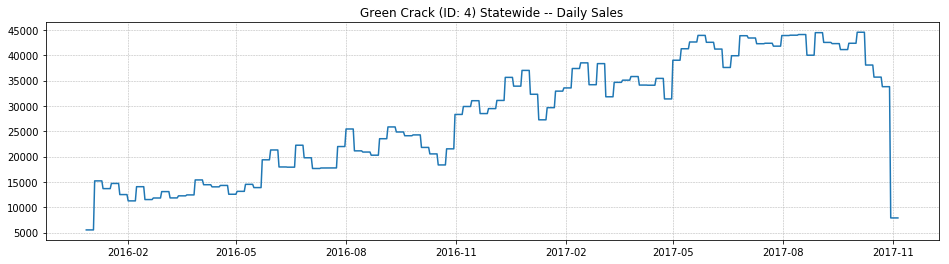

In [2]:
PlotRawData(product='green crack') # daily data upsampled from weekly data

## Same thing, but showing the original (not upsampled) weekly data

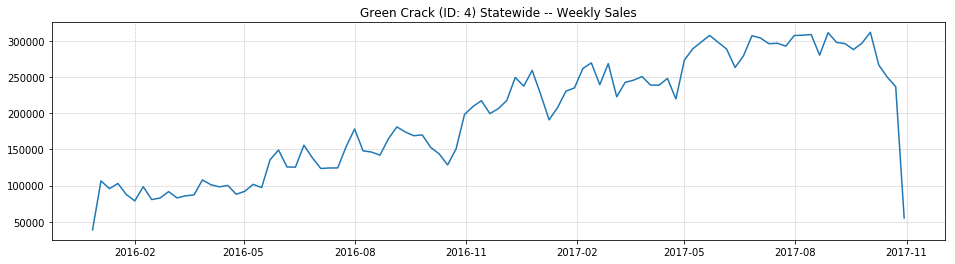

In [9]:
PlotRawData(product='green crack', upsample=False)

## Raw time series of Green Crack (daily UNITS SOLD, this time, versus $$) in Seattle
* Can use strain name in lower case OR strain id

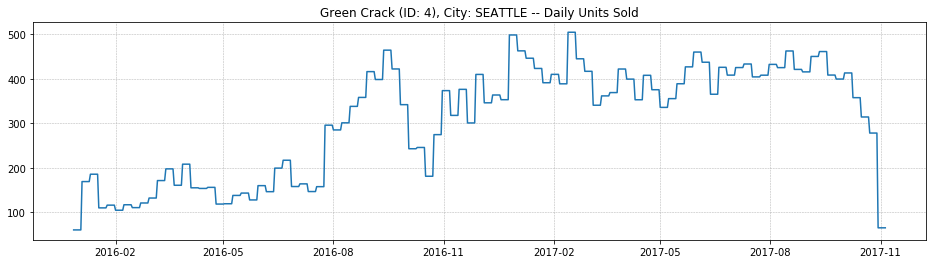

In [3]:
PlotRawData(product=4, city='Seattle', plot_sales=False)

## Raw time series of all cannabis sales at Sparket in Port Angeles

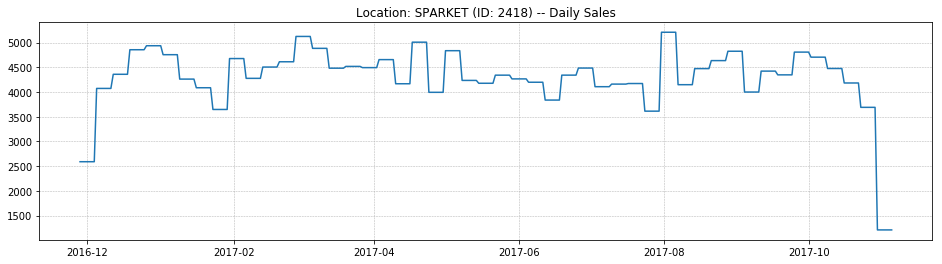

In [4]:
PlotRawData(location='sparket')


## Plot time series of 5-wk moving avg of statewide daily sales over most recent 15 weeks for multiple products

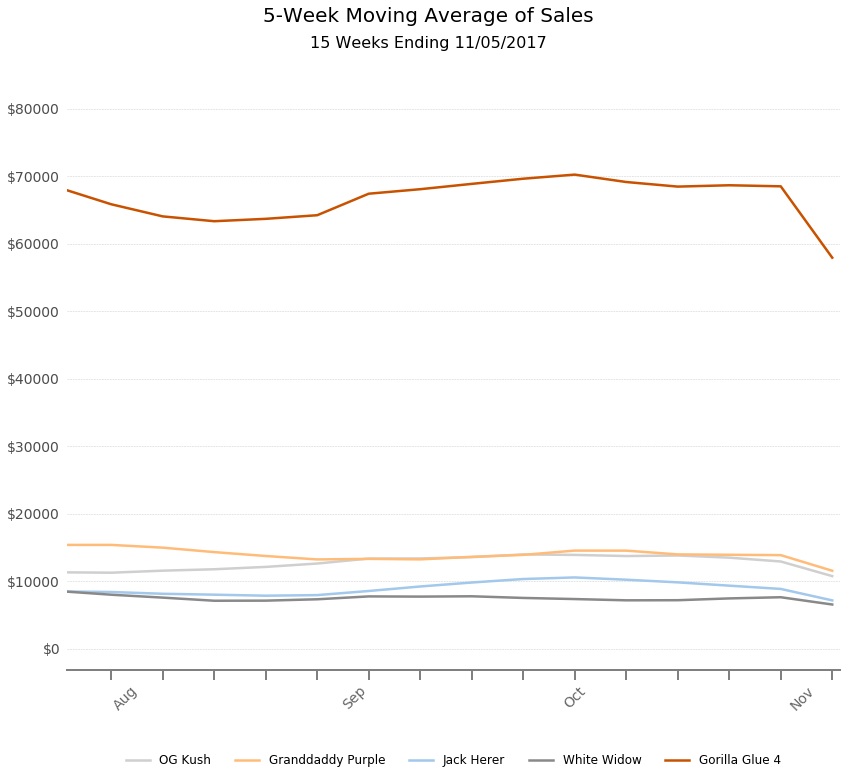

In [5]:
prods = range(5, 10)  # Product IDs
PlotCompTrends(products=prods, period_wks=15, end_date=None, MA_param=5, legend=True, 
               palette=ColorBlind_10)

## Ditto, but filtering daily sales for Port Angeles

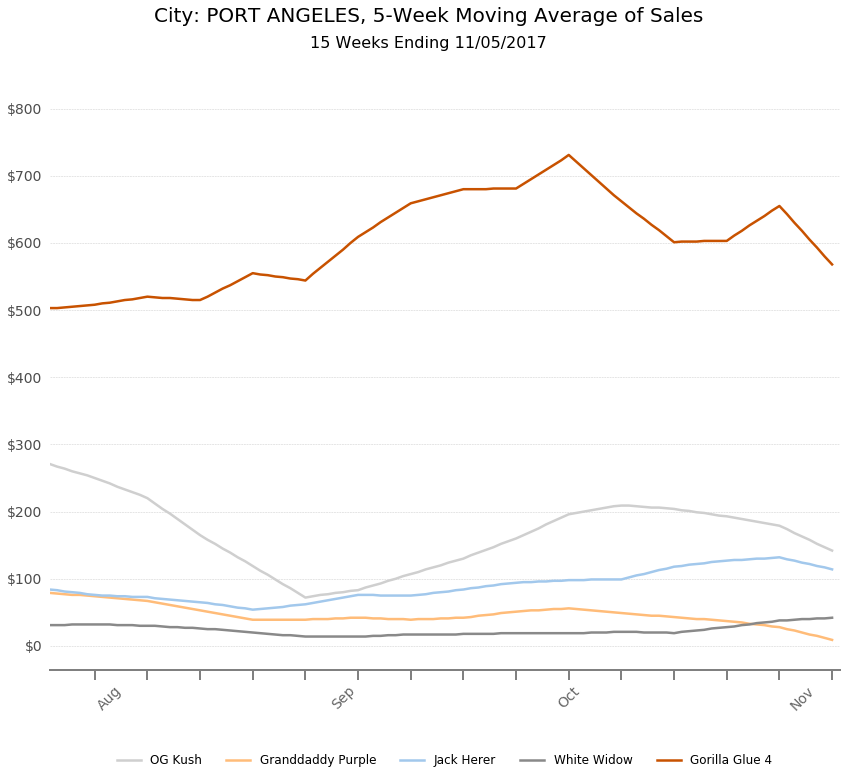

In [6]:
PlotCompTrends(products=prods, cities=['Port Angeles'], period_wks=15, end_date=None, 
               MA_param=5, legend=True, palette=ColorBlind_10)

## Compare normalized/rescaled sales trends among three products over the last 12 weeks of 2016.

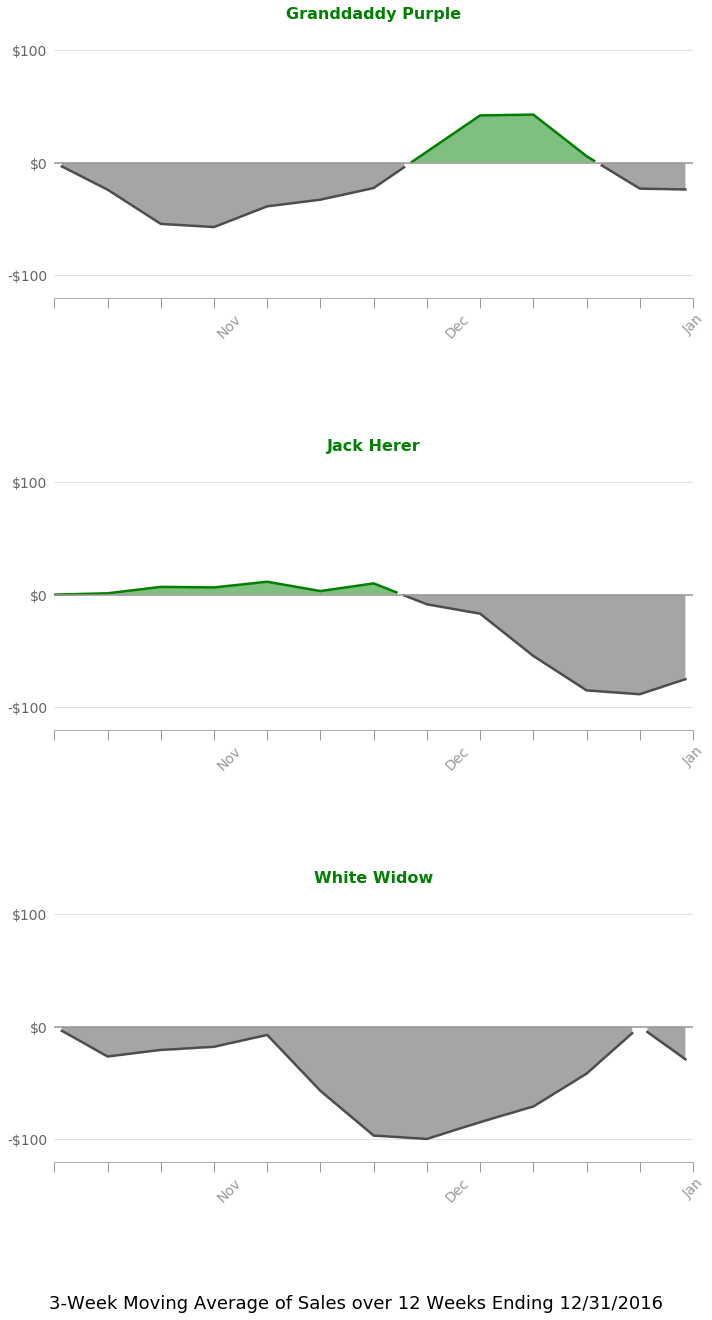

In [8]:
PlotFilledTrends(products=[6,7,8], period_wks=12, end_date='12/31/2016', MA_param=3, 
                 normed=True)



## What were the three most popular three OG strains in Redmond during the 15 Weeks ending July 1, 2017?



In [40]:
# Step 1. Identify all the strain IDs for products with 'OG' in the name
og_ids = []
for k, v in strain_dict.iteritems():
    if 'og' in k:
        og_ids.append(v)
        

In [ ]:
# Step 2. Feed all 'og' strain IDs into a SalesStatsDF object (dataframe)
all_Redmond_OGs = SalesStatsDF(period_wks=15, end_date='07/01/2017', 
                               products=og_ids, cities=['Redmond'], 
                               NaN_allowance=100
                              )

# NOTE: By setting NaN_allowance to 100 (percent), we include all strains regardless of any
# discontinuity of sales data over our sample period. Strains with a high incidence of null
# values will tend to drop to the bottom of the rankings in Step 3 below.

In [53]:
all_Redmond_OGs.head(10) # Stats unranked

,product_name,product_id,place_name,place_id,avg weekly sales,SHIFTED to t0=0 avg weekly gain ($),NORMD growth rate,5wk MA SHIFTED to t0=0 avg weekly gain ($),5wk MA NORMD growth rate
0,Face Off OG,552,REDMOND,None,0.0,0.0,0.000000,0.0,0.000000
1,Lemon OG,155,REDMOND,None,3.0,0.0,0.698413,0.0,0.000000
2,Dragon OG,1652,REDMOND,None,15.0,0.0,3.601225,0.0,1.375661
3,Ghost OG,133,REDMOND,None,21.0,0.0,3.111111,0.0,2.512472
4,SFV OG,116,REDMOND,None,23.0,-0.0,-1.417514,0.0,1.326984
5,Alien OG,71,REDMOND,None,49.0,1.0,4.231830,0.0,3.984127
6,Merlot OG,1568,REDMOND,None,0.0,0.0,0.000000,0.0,0.000000
7,OG Chem,398,REDMOND,None,127.0,2.0,1.504974,0.0,0.000000
8,Sfv OG Kush,279,REDMOND,None,0.0,0.0,0.000000,0.0,0.000000
9,Black Cherry OG,563,REDMOND,None,0.0,0.0,0.000000,0.0,0.000000


In [55]:
# Step 3. Rank products by sales. Feed all_Redmond_OGs into a RankProductsPlaces class. Limit
# to top-10 results

rank_Redmond_OGs = RankProductsPlaces(all_Redmond_OGs, N_results=10)
rank_Redmond_OGs.main(smoothed=False, stat='sales')

In [57]:
Redmond_OG_df = rank_Redmond_OGs.results # access results and other attributes to view results
Redmond_OG_df

,product_name,avg weekly sales
1,White Fire OG,191.0
2,OG Chem,127.0
3,Opal OG Kush,76.0
4,OG Kush,74.0
5,Tahoe OG,70.0
6,Alien OG,49.0
7,Fire OG,48.0
8,Skywalker OG,38.0
9,Nightfire OG,36.0
10,Beast Mode OG,31.0


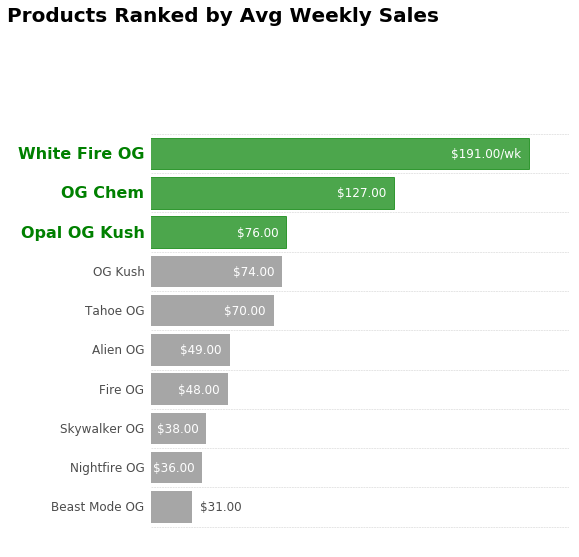

In [61]:
# Step 4. Grab the top-ten products and feed into HbarRanked

Top_10s = list(Redmond_OG_df['product_name'].values)
HbarRanked(period_wks=15, end_date='07/01/2017', products=Top_10s, cities=['Redmond'],
          MA_param=None, rank_by=['sales'], NaN_allowance=100)

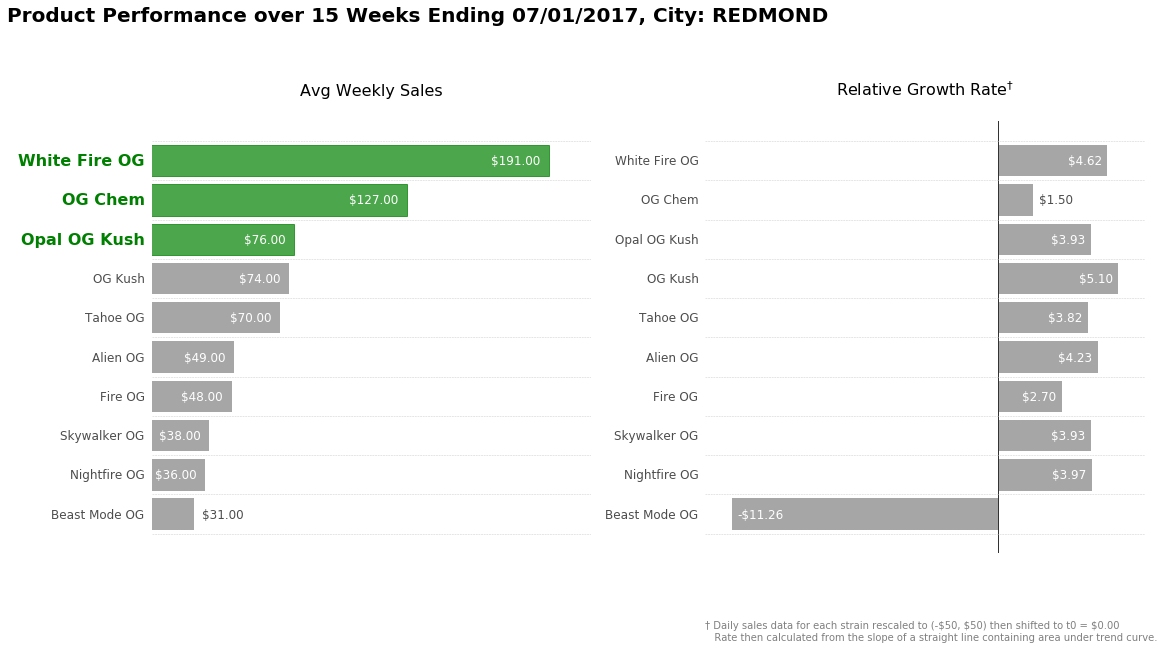

In [64]:
# Step 5. See how these products measure up over sales AND relative growth rate in sales

Top_10s = list(Redmond_OG_df['product_name'].values)
HbarRanked(period_wks=15, end_date='07/01/2017', products=Top_10s, cities=['Redmond'],
          MA_param=None, rank_by=['sales', 'rate'], NaN_allowance=100,
          manual_data_label_format=(1,0,0,2))

### Over five consecutive 13-week periods spaced monthly, which Snohomish County dispensaries showed the strongest, most consistent relative performance in average weekly gains in sales?

In [65]:
# Step 1. From the web, copy in all the zipcodes in Snohomish County and convert to
# a list of ints.
a = "98012 | 98019 | 98020 | 98021 | 98026 | 98036 | 98037 | 98043 | 98072 | 98077 | 98087 | 98201 | 98203 | 98204 | 98208 | 98223 | 98241 | 98251 | 98252 | 98258 | 98270 | 98271 | 98272 | 98275 | 98290 | 98292 | 98294 | 98296"
b = "98046 | 98082 | 98206 | 98213 | 98256 | 98259 | 98287 | 98291 | 98293"

A = a.split(' | ')
A.extend(b.split(' | '))
A.append('98207')

snohomish_zips = [int(x) for x in A]

In [66]:
connection_str = 'postgresql:///uplift'

In [67]:
%%time
snohomish_shops = biz_lookup(connection_str, zipcodes=snohomish_zips)

# Step 2.a Look up all dispensaries in the listed zipcodes and return a list of their IDs.

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 8.17 s


In [68]:
# Step 2.b  Some of the names will be 'none'. This warrants investigation of the database and 
# pipeline! But...in the meantime, convert the IDs to names and exclude those that appear as 
# 'none'.

sno_names_raw = [locations_name_from_ID(ID) for ID in snohomish_shops]

sno_names = []
for name in sno_names_raw:
    if name is not None:
        sno_names.append(name)
    else:
        continue

In [69]:
%%time
BSD_4, labels_4 = BestSellerData(period_wks=13, end_date='07/31/2017', products=[None],
                                locations=sno_names, cities=[None], zipcodes=[None],
                                MA_param=5, N_periods=5, freq='M', rank_by='gain', 
                                NaN_allowance=100, print_rejects=False)

# Step 3.  Generate a BestSellerData df and labeler for plotting. This took 1:41 to run on
# an AWS t2.large EC2 instance.

CPU times: user 3.01 s, sys: 44 ms, total: 3.05 s
Wall time: 1min 41s


In [70]:
BSD_4 # Here's what the raw BestSeller data looks like. 

,euphorium,kushman,t.h.c.supermarket,thc connection,green lady everett,purple haze,kushmart south everett,gold bar marijuana,cannabis provisions inc. mukilteo,local roots marijuana,...,euphorium lynnwood,fweedom cannabis,puget sound marijuana,cannablyss,herbal nation,high society,green city collective,cascade kropz,white rabbit retail,kushmart
2017-03-31,5,2,9,4,6,1,3,12,14,10,...,16,17,20,18,21,22,28,25,26,24
2017-04-30,4,5,8,10,12,2,1,18,15,11,...,21,19,14,22,26,24,28,17,25,27
2017-05-31,2,4,8,5,11,7,1,14,13,15,...,21,20,16,17,23,26,28,24,25,27
2017-06-30,3,8,5,2,4,11,24,7,10,12,...,15,20,21,18,23,22,1,27,25,26
2017-07-31,8,12,1,10,6,18,24,2,5,9,...,15,14,19,17,4,11,22,26,20,27


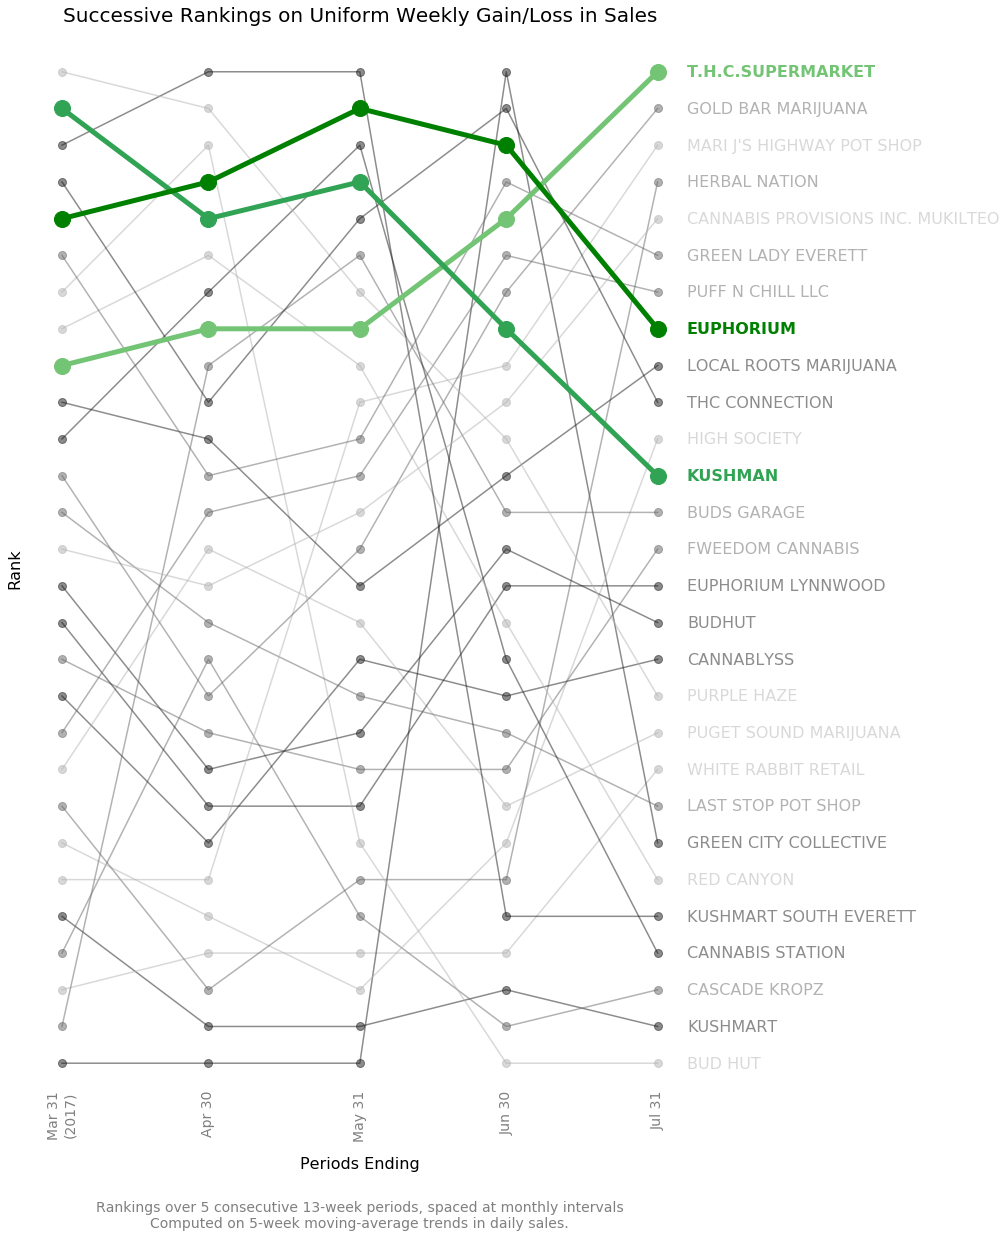

In [71]:
# Step 4. Plot
PlotBestSellers(BSD_4, labels_4, N_top=3)